In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Importing stock prices

In [2]:
df = yf.download(tickers='RCDO.L', start='2021-01-01', end='2023-01-01')
df = df[['Close']]
df

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2021-01-04,339.0
2021-01-05,342.0
2021-01-06,340.0
2021-01-07,348.0
2021-01-08,339.0
...,...
2022-12-22,475.0
2022-12-23,475.0
2022-12-28,477.5


In [3]:
df.dtypes

Close    float64
dtype: object

In [4]:
df.index = df.index.strftime('%d-%m-%Y')

In [5]:
df.head(10)

,Close
Date,
04-01-2021,339.0
05-01-2021,342.0
06-01-2021,340.0
07-01-2021,348.0
08-01-2021,339.0
11-01-2021,340.0
12-01-2021,348.0
13-01-2021,348.0
14-01-2021,403.0


In [6]:
df.isna().any()

Close    False
dtype: bool

In [7]:
df.describe()

,Close
count,503.000000
mean,419.020378
std,37.118816
min,331.500000
25%,391.250000
50%,422.000000
75%,449.500000
max,490.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 04-01-2021 to 30-12-2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   503 non-null    float64
dtypes: float64(1)
memory usage: 7.9+ KB


## Distributions

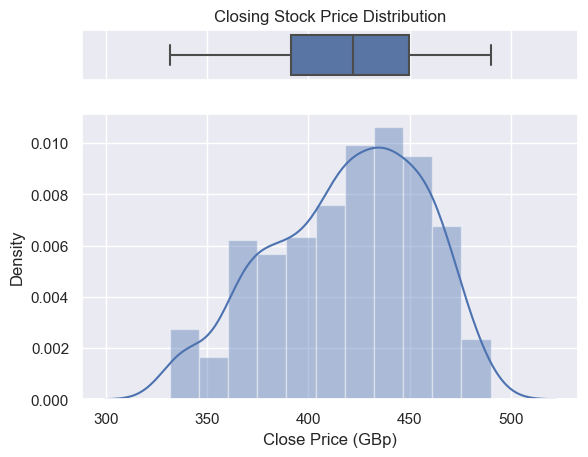

In [9]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(x=df["Close"], ax=ax_box).set_title('Closing Stock Price Distribution')
sns.distplot(x=df["Close"], ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_hist.set(xlabel='Close Price (GBp)')
#sns.suptitle('Overall Title')
plt.show()

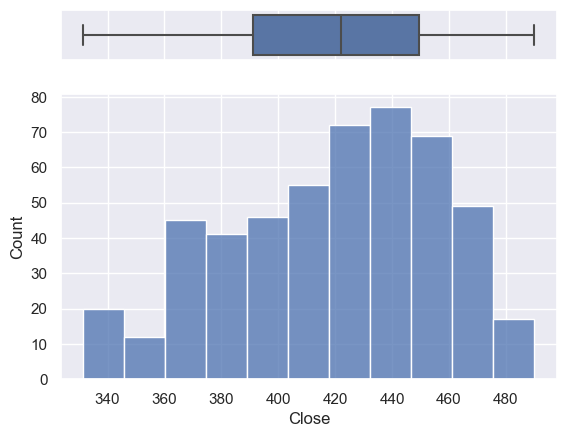

In [10]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(x=df["Close"], ax=ax_box)
sns.histplot(data=df, x="Close", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

## 10 Years

In [11]:
df = yf.download(tickers='RCDO.L', start='2012-01-01', end='2023-01-01')
df= df[['Close']]

[*********************100%***********************]  1 of 1 completed


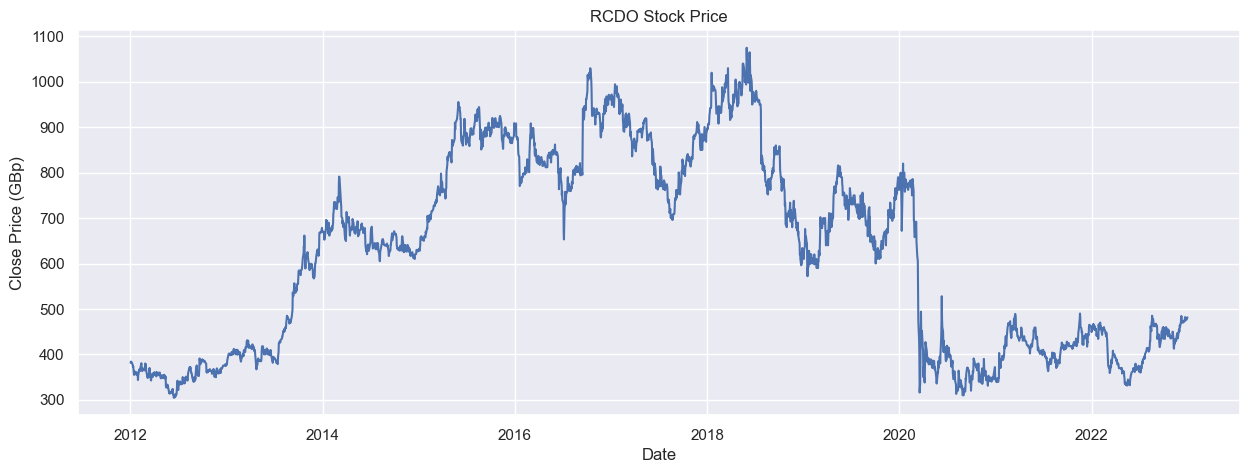

In [12]:
plt.figure(figsize=(15, 5))
sns.set(style="darkgrid")
plt.plot(df.index, df['Close'])
plt.xlabel("Date")
plt.ylabel("Close Price (GBp)")
plt.title("RCDO Stock Price")
plt.show()

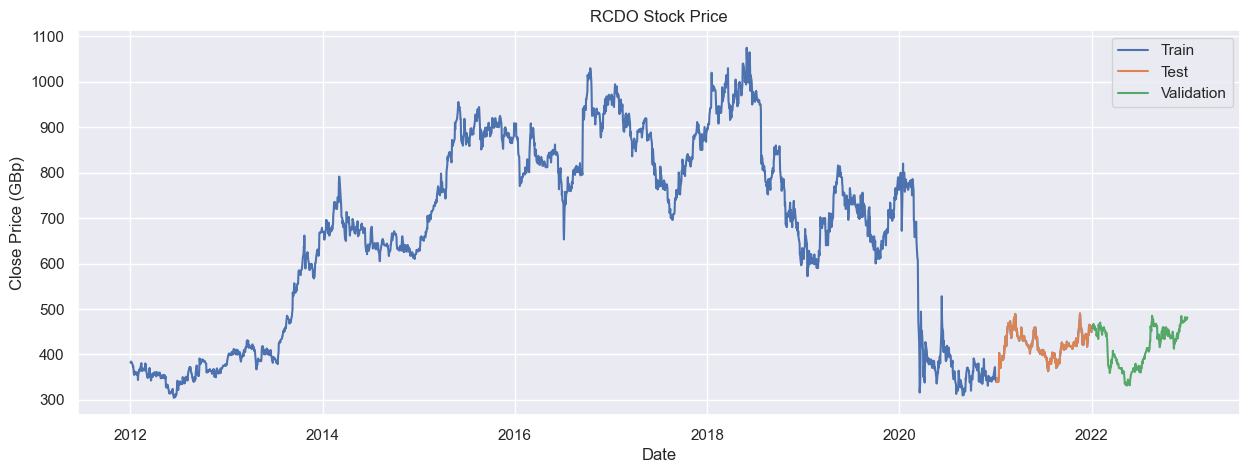

In [13]:
# training between 2012 and 2022
train_data_df = df[df.index < '2022-01-01'].copy()

# validation on 2022
val_data_df = df[df.index >= '2022-01-01'].copy()

q_90 = int(len(train_data_df) * .9)
test_data_df = train_data_df[q_90:]

plt.figure(figsize=(15, 5))
sns.set(style="darkgrid")
plt.xlabel("Date")
plt.ylabel("Close Price (GBp)")
plt.title("RCDO Stock Price")
plt.plot(train_data_df.index, train_data_df['Close'])
plt.plot(test_data_df.index, test_data_df['Close'])
plt.plot(val_data_df.index, val_data_df['Close'])

plt.legend(['Train', 'Test', 'Validation'])

## Moving Averages

### 2020

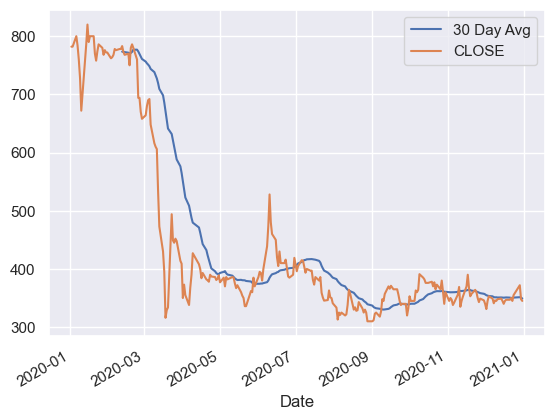

In [14]:
df['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close'].loc['2020-01-01':'2021-01-01'].plot(label='CLOSE')
plt.legend()

### 2021

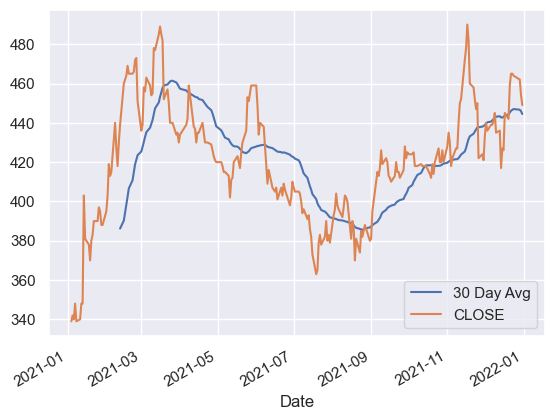

In [15]:
df['Close'].loc['2021-01-01':'2022-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close'].loc['2021-01-01':'2022-01-01'].plot(label='CLOSE')
plt.legend()

### 2022

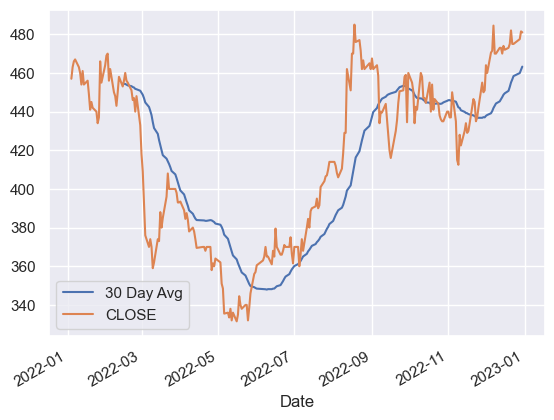

In [16]:
df['Close'].loc['2022-01-01':'2023-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close'].loc['2022-01-01':'2023-01-01'].plot(label='CLOSE')
plt.legend()

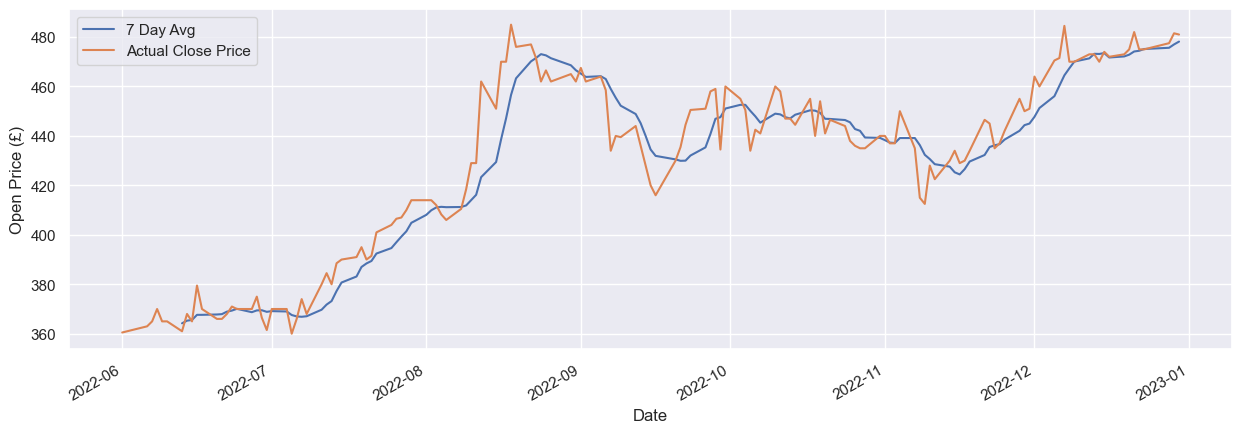

In [17]:
plt.figure(figsize=(15, 5))
df['Close'].loc['2022-06-01':'2023-01-01'].rolling(window=7).mean().plot(label='7 Day Avg')
df['Close'].loc['2022-06-01':'2023-01-01'].plot(label='Actual Close Price')
plt.xlabel("Date")
plt.ylabel("Open Price (£)")
plt.legend()

## Kurtosis
https://towardsdatascience.com/financial-analytics-exploratory-data-analysis-of-stock-data-d98cbadf98b9

Kurtosis tells you the ‘fatness’ of the tail and it is important because it tells you how ‘extreme’ can the values get.

Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution.

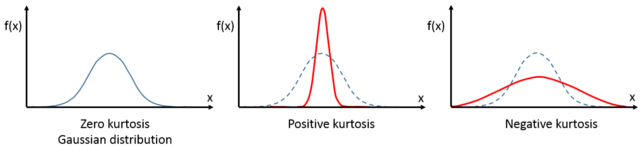

https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/Simon

In [18]:
df['Close'].kurtosis()

-1.4028824653322052

## Results

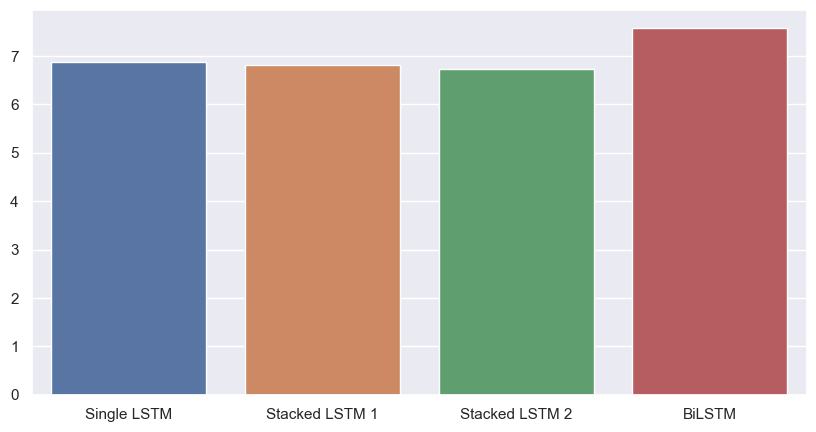

In [19]:
plt.figure(figsize=(10, 5))
sns.set(style="darkgrid")
mae_values = [6.868, 6.820, 6.734, 7.575]
labels = ['Single LSTM', 'Stacked LSTM 1', 'Stacked LSTM 2', 'BiLSTM']
sns.barplot(x=labels, y=mae_values)
#plt.xticks(rotation=45, ha="right")
plt.show()